<h1> <font color='#002B54'><center>AUDIO SENTIMENT ANALYSIS By Sonic SARK</center></font></h1>
<h3><center><font color='#391242'>To detect Emotion of the user from audio file</font></center></h3>


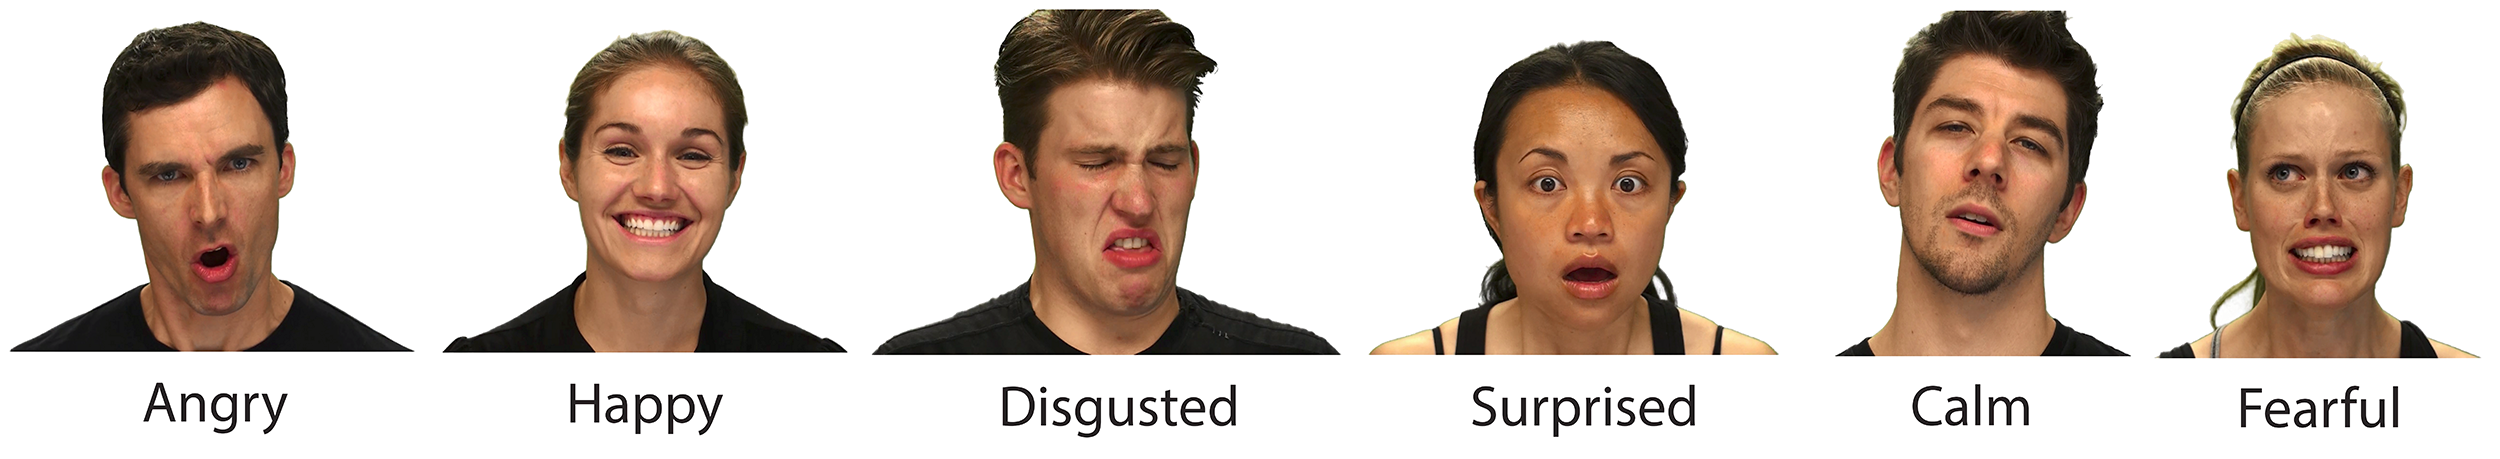

<h1> <font color='#002B54'>Importing necessary modules</font></h1>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
   
import librosa as lr

import librosa
import speech_recognition as sr

import IPython.display as ipd
import librosa.display

## <font color='#002B54'>1.Loading Dataset</font>

In [2]:
# loading audio files of 24 actors and their respective path from Ravdess Dataset with path
import os
os.listdir(path='Dataset')

def getListOfFiles(dirName):
    listOfFile=os.listdir(dirName)
    allFiles=list()
    for entry in listOfFile:
        fullPath=os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles=allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

dirName = 'Dataset'
listOfFiles = getListOfFiles(dirName)
print("Total Number of Audio Files is ",len(listOfFiles))

Total Number of Audio Files is  1440


In [3]:
listOfFiles

['Dataset\\Actor_01\\03-01-01-01-01-01-01.wav',
 'Dataset\\Actor_01\\03-01-01-01-01-02-01.wav',
 'Dataset\\Actor_01\\03-01-01-01-02-01-01.wav',
 'Dataset\\Actor_01\\03-01-01-01-02-02-01.wav',
 'Dataset\\Actor_01\\03-01-02-01-01-01-01.wav',
 'Dataset\\Actor_01\\03-01-02-01-01-02-01.wav',
 'Dataset\\Actor_01\\03-01-02-01-02-01-01.wav',
 'Dataset\\Actor_01\\03-01-02-01-02-02-01.wav',
 'Dataset\\Actor_01\\03-01-02-02-01-01-01.wav',
 'Dataset\\Actor_01\\03-01-02-02-01-02-01.wav',
 'Dataset\\Actor_01\\03-01-02-02-02-01-01.wav',
 'Dataset\\Actor_01\\03-01-02-02-02-02-01.wav',
 'Dataset\\Actor_01\\03-01-03-01-01-01-01.wav',
 'Dataset\\Actor_01\\03-01-03-01-01-02-01.wav',
 'Dataset\\Actor_01\\03-01-03-01-02-01-01.wav',
 'Dataset\\Actor_01\\03-01-03-01-02-02-01.wav',
 'Dataset\\Actor_01\\03-01-03-02-01-01-01.wav',
 'Dataset\\Actor_01\\03-01-03-02-01-02-01.wav',
 'Dataset\\Actor_01\\03-01-03-02-02-01-01.wav',
 'Dataset\\Actor_01\\03-01-03-02-02-02-01.wav',
 'Dataset\\Actor_01\\03-01-04-01-01-01-0

## <font color='#002B54'>2.Separating & Labelling Emotions from Dataset</font>

<font color='#002B54'> The filenames are formatted in such a way that third part (5th and 6th value) from the filename represents the emotion of the audio.

For example--> 
02-01-**06**-01-02-01-12.wav here 06 represents **fear** emotion. </font>


In [4]:
import pandas as pd
file_emotion = []
file_path = []

for i in listOfFiles:
        part = i.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(i)
        
# Storing 3rd part of every file into emotion_df dataframe 
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# Concatenating file_emotion and file_path into Ravdess_df
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# Labeling integers into their respective classes
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)


In [5]:
emotion_df.head()

Emotions
0         1
1         1
2         1
3         1
4         2

In [6]:
Ravdess_df.head()

Emotions                                       Path
0  neutral  Dataset\Actor_01\03-01-01-01-01-01-01.wav
1  neutral  Dataset\Actor_01\03-01-01-01-01-02-01.wav
2  neutral  Dataset\Actor_01\03-01-01-01-02-01-01.wav
3  neutral  Dataset\Actor_01\03-01-01-01-02-02-01.wav
4     calm  Dataset\Actor_01\03-01-02-01-01-01-01.wav

In [7]:
Ravdess_df.shape

(1440, 2)

##  <font color='#002B54'>3.Basic Visualization</font>

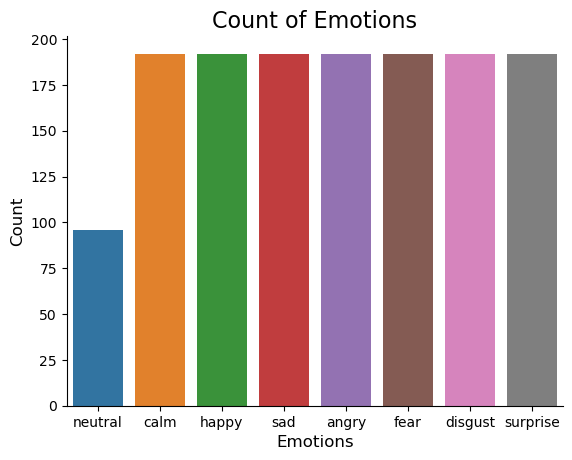

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.title('Count of Emotions', size=16)
sns.countplot(x=Ravdess_df.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

### <font color='#002B54'> Amplitude vs Time Graph </font>

The audio signal is a three-dimensional signal in which three axes represent time, amplitude and frequency.

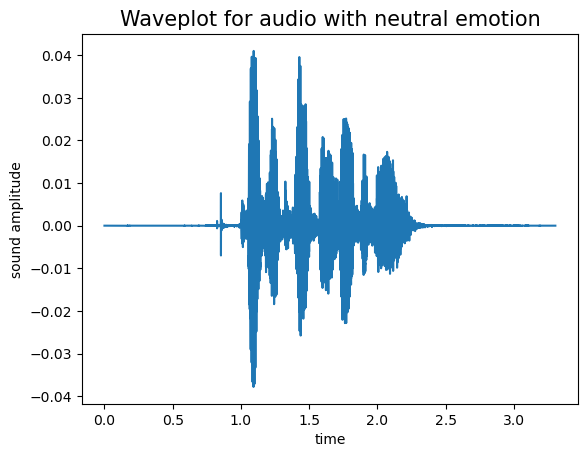

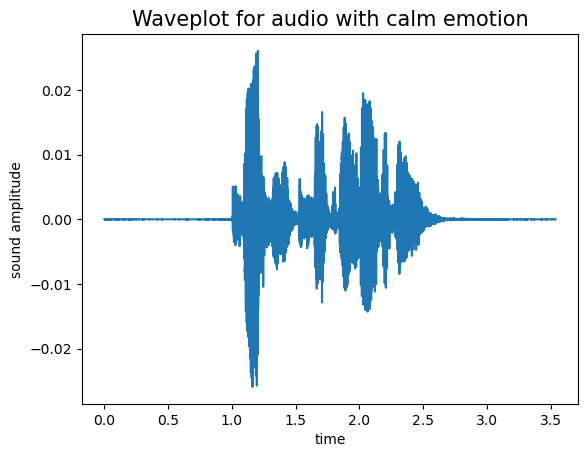

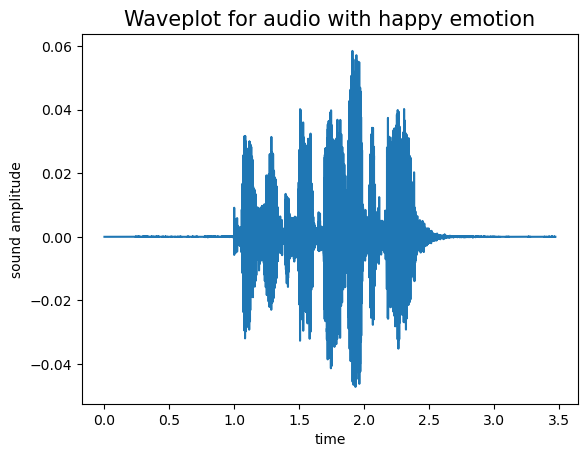

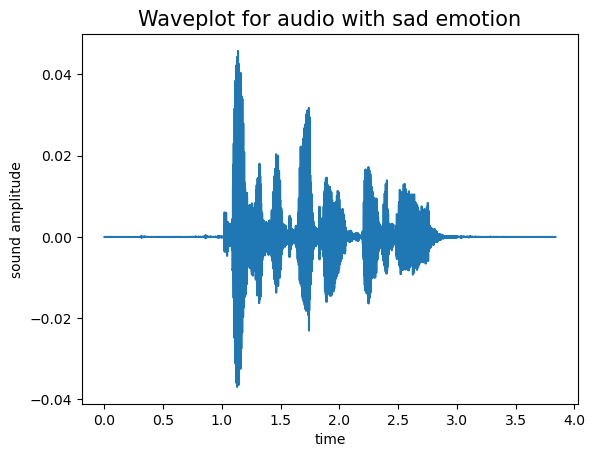

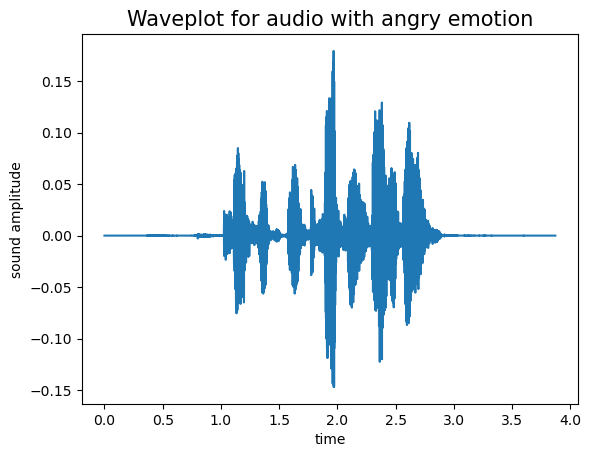

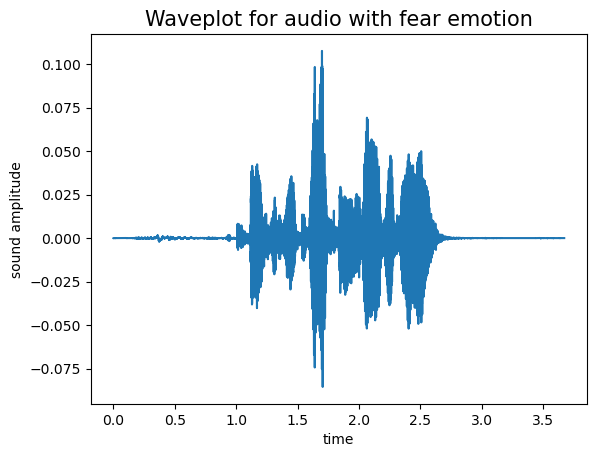

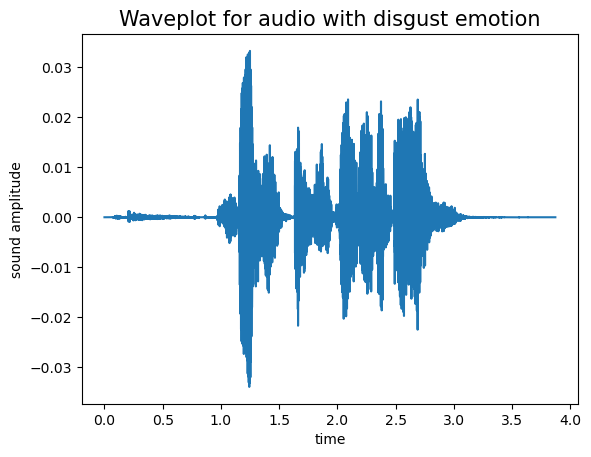

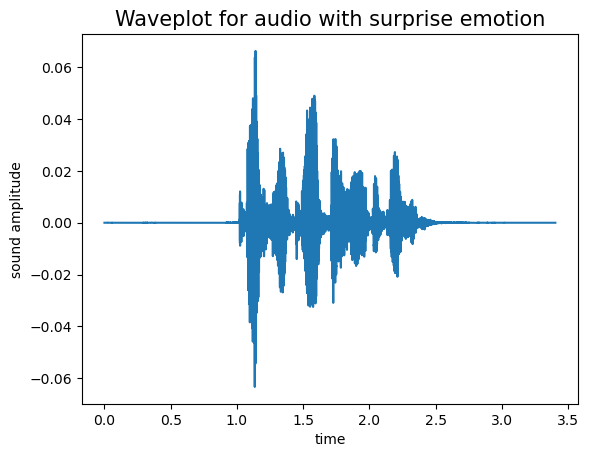

In [9]:
# Plotting amplitude vs time graph for each emotion
import librosa as lr
import numpy as np
for i in Ravdess_df['Emotions'].unique():
    path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==i])[0]
    audio,sfreq=lr.load(path)
    time=np.arange(0,len(audio))/sfreq
    fig,ax=plt.subplots()
    ax.plot(time,audio)
    ax.set(xlabel="time",ylabel="sound amplitude")
    plt.title('Waveplot for audio with {} emotion'.format(i), size=15)
    plt.show()

### <font color='#002B54'> Waveplots & Spectrogram </font>

[ 7.65898407e-01  7.93222010e-01  7.88278162e-01  7.98252702e-01
  7.69864619e-01  6.80034041e-01  6.73257947e-01  7.18917072e-01
  7.63574719e-01  7.52278864e-01  7.01803267e-01  7.10814476e-01
 -6.91587891e+02  5.80246620e+01  1.59464523e-01  1.36246500e+01
  5.37411213e+00  1.16233635e+00 -2.08335972e+00 -5.38258505e+00
 -1.03328238e+01 -3.66208076e+00  5.60600877e-01 -2.83822560e+00
  1.83478546e+00 -3.42950559e+00 -2.00895929e+00  8.97352159e-01
 -4.95661640e+00 -3.09280658e+00  8.49378854e-02  8.25506076e-02
 -5.34268522e+00 -1.03005219e+00 -1.95169175e+00 -3.35132504e+00
 -1.30885649e+00 -3.24095428e-01 -4.17697668e+00 -3.09285283e-01
 -2.18185139e+00 -2.92725146e-01 -1.80712783e+00 -2.13434434e+00
 -2.39504170e+00 -1.90293705e+00 -2.76443124e+00 -1.97917771e+00
 -1.10450304e+00 -2.72953725e+00 -3.50890613e+00 -2.24637461e+00
  3.21333255e-06  6.15197932e-05  3.44661740e-03  2.20435970e-02
  5.01430929e-02  1.60143897e-02  3.68361012e-03  2.18729135e-02
  2.70099360e-02  5.01821

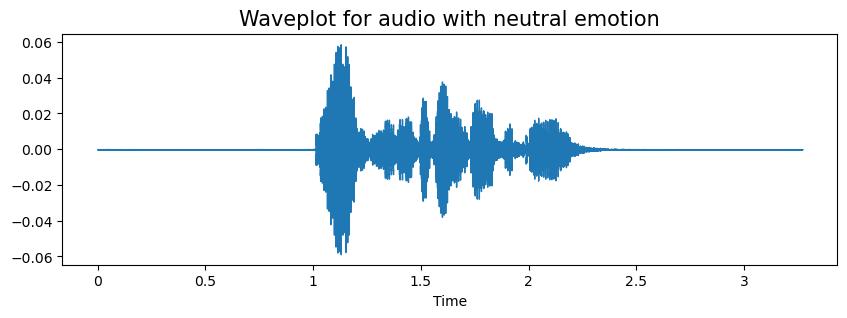

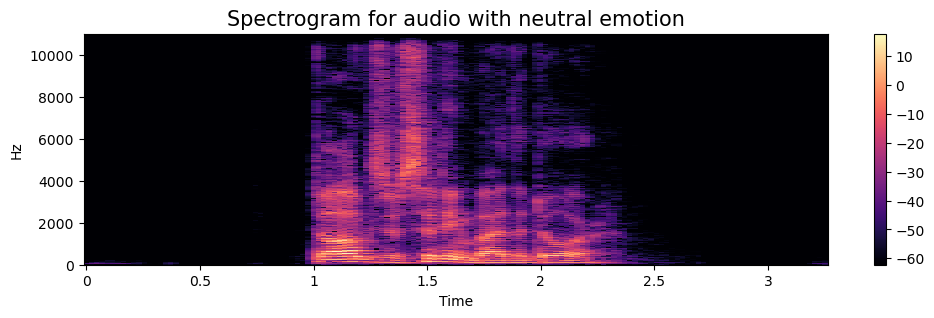

-------------------------------------------------------------
[ 7.65898407e-01  7.93222010e-01  7.88278162e-01  7.98252702e-01
  7.69864619e-01  6.80034041e-01  6.73257947e-01  7.18917072e-01
  7.63574719e-01  7.52278864e-01  7.01803267e-01  7.10814476e-01
 -6.91587891e+02  5.80246620e+01  1.59464523e-01  1.36246500e+01
  5.37411213e+00  1.16233635e+00 -2.08335972e+00 -5.38258505e+00
 -1.03328238e+01 -3.66208076e+00  5.60600877e-01 -2.83822560e+00
  1.83478546e+00 -3.42950559e+00 -2.00895929e+00  8.97352159e-01
 -4.95661640e+00 -3.09280658e+00  8.49378854e-02  8.25506076e-02
 -5.34268522e+00 -1.03005219e+00 -1.95169175e+00 -3.35132504e+00
 -1.30885649e+00 -3.24095428e-01 -4.17697668e+00 -3.09285283e-01
 -2.18185139e+00 -2.92725146e-01 -1.80712783e+00 -2.13434434e+00
 -2.39504170e+00 -1.90293705e+00 -2.76443124e+00 -1.97917771e+00
 -1.10450304e+00 -2.72953725e+00 -3.50890613e+00 -2.24637461e+00
  3.21333255e-06  6.15197932e-05  3.44661740e-03  2.20435970e-02
  5.01430929e-02  1.60143897

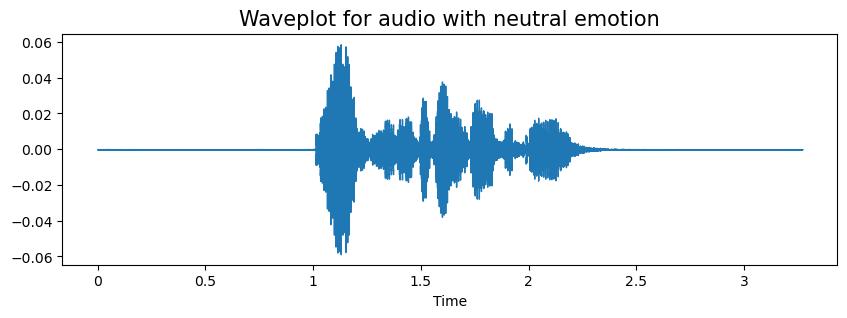

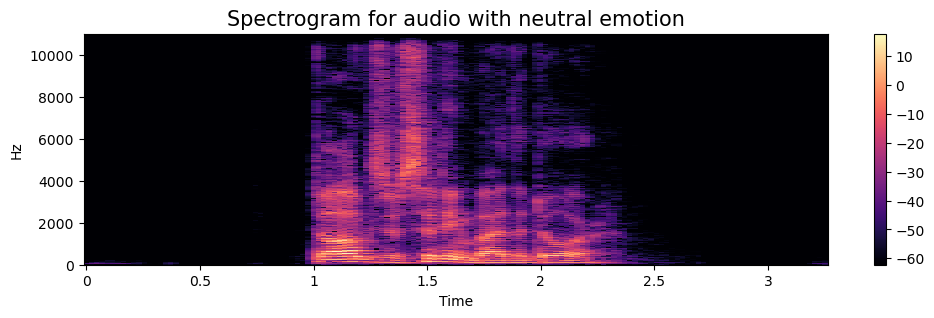

-------------------------------------------------------------
[ 7.65898407e-01  7.93222010e-01  7.88278162e-01  7.98252702e-01
  7.69864619e-01  6.80034041e-01  6.73257947e-01  7.18917072e-01
  7.63574719e-01  7.52278864e-01  7.01803267e-01  7.10814476e-01
 -6.91587891e+02  5.80246620e+01  1.59464523e-01  1.36246500e+01
  5.37411213e+00  1.16233635e+00 -2.08335972e+00 -5.38258505e+00
 -1.03328238e+01 -3.66208076e+00  5.60600877e-01 -2.83822560e+00
  1.83478546e+00 -3.42950559e+00 -2.00895929e+00  8.97352159e-01
 -4.95661640e+00 -3.09280658e+00  8.49378854e-02  8.25506076e-02
 -5.34268522e+00 -1.03005219e+00 -1.95169175e+00 -3.35132504e+00
 -1.30885649e+00 -3.24095428e-01 -4.17697668e+00 -3.09285283e-01
 -2.18185139e+00 -2.92725146e-01 -1.80712783e+00 -2.13434434e+00
 -2.39504170e+00 -1.90293705e+00 -2.76443124e+00 -1.97917771e+00
 -1.10450304e+00 -2.72953725e+00 -3.50890613e+00 -2.24637461e+00
  3.21333255e-06  6.15197932e-05  3.44661740e-03  2.20435970e-02
  5.01430929e-02  1.60143897

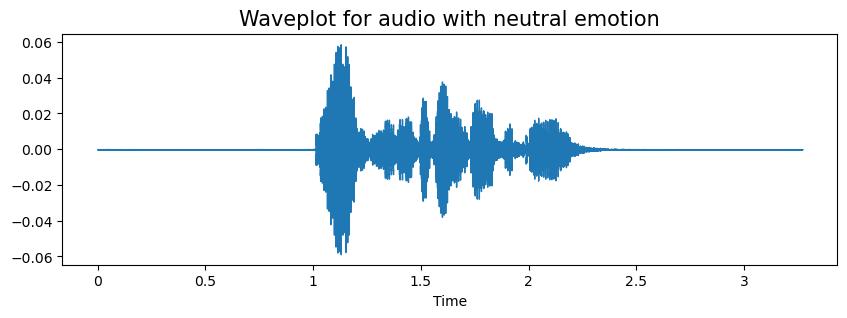

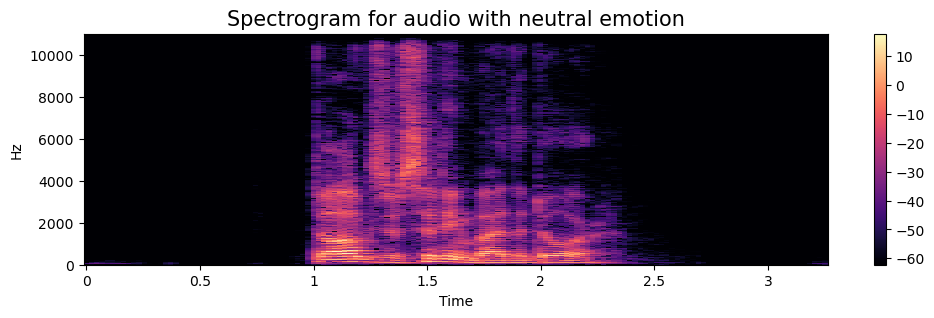

-------------------------------------------------------------
[ 7.65898407e-01  7.93222010e-01  7.88278162e-01  7.98252702e-01
  7.69864619e-01  6.80034041e-01  6.73257947e-01  7.18917072e-01
  7.63574719e-01  7.52278864e-01  7.01803267e-01  7.10814476e-01
 -6.91587891e+02  5.80246620e+01  1.59464523e-01  1.36246500e+01
  5.37411213e+00  1.16233635e+00 -2.08335972e+00 -5.38258505e+00
 -1.03328238e+01 -3.66208076e+00  5.60600877e-01 -2.83822560e+00
  1.83478546e+00 -3.42950559e+00 -2.00895929e+00  8.97352159e-01
 -4.95661640e+00 -3.09280658e+00  8.49378854e-02  8.25506076e-02
 -5.34268522e+00 -1.03005219e+00 -1.95169175e+00 -3.35132504e+00
 -1.30885649e+00 -3.24095428e-01 -4.17697668e+00 -3.09285283e-01
 -2.18185139e+00 -2.92725146e-01 -1.80712783e+00 -2.13434434e+00
 -2.39504170e+00 -1.90293705e+00 -2.76443124e+00 -1.97917771e+00
 -1.10450304e+00 -2.72953725e+00 -3.50890613e+00 -2.24637461e+00
  3.21333255e-06  6.15197932e-05  3.44661740e-03  2.20435970e-02
  5.01430929e-02  1.60143897

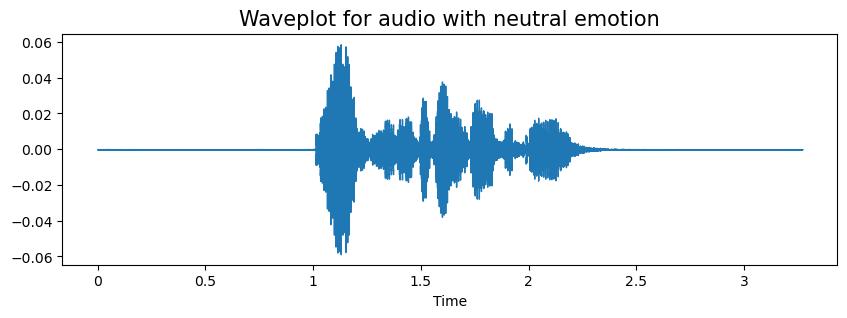

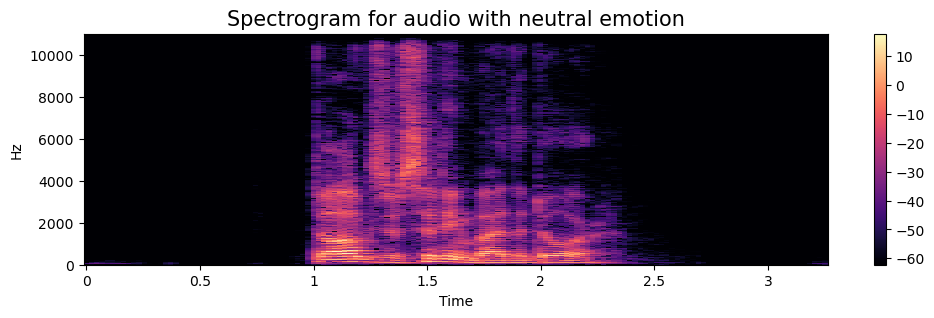

-------------------------------------------------------------
[ 6.88525736e-01  7.38671720e-01  7.71074533e-01  7.90327728e-01
  7.39264488e-01  6.67541444e-01  6.57455862e-01  6.80097580e-01
  7.03753352e-01  7.05024660e-01  7.13346958e-01  6.99988067e-01
 -6.97166138e+02  6.51082001e+01  9.30368006e-01  1.36336269e+01
  5.95959616e+00  2.89507008e+00 -1.34181857e+00 -4.77575350e+00
 -8.67151546e+00 -4.55299854e+00  1.97060466e+00 -1.62764609e+00
  1.42672610e+00 -4.51268101e+00  1.48563385e+00  1.20333739e-01
 -6.28618574e+00 -2.64415145e+00 -7.36551881e-02 -1.72462070e+00
 -5.88814878e+00 -1.49296069e+00 -2.29405189e+00 -3.25107551e+00
 -2.33111525e+00 -1.04993606e+00 -5.42169714e+00  8.98910344e-01
 -3.83309627e+00 -1.10061169e-01 -3.14054656e+00 -1.75259769e+00
 -2.55071330e+00 -3.11522031e+00 -4.21817684e+00 -2.03045154e+00
 -2.16783547e+00 -2.31338167e+00 -4.75838470e+00 -2.87276316e+00
  1.86359341e-06  8.65261245e-05  8.06221459e-03  5.18941395e-02
  3.25559787e-02  1.93524268

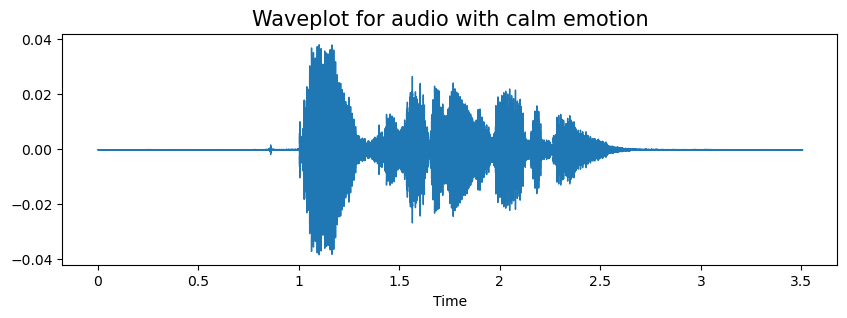

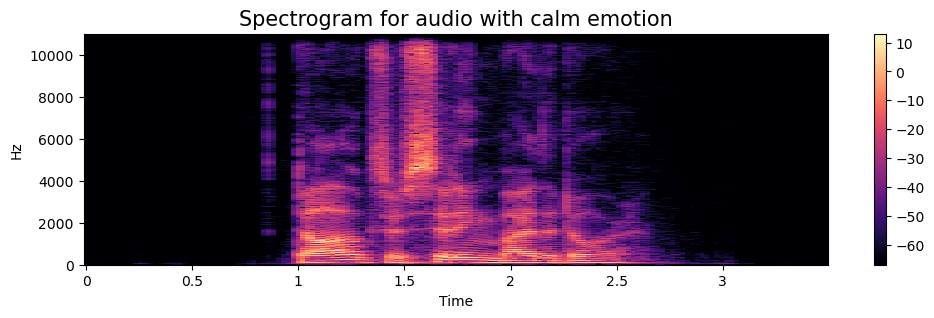

-------------------------------------------------------------
[ 6.88525736e-01  7.38671720e-01  7.71074533e-01  7.90327728e-01
  7.39264488e-01  6.67541444e-01  6.57455862e-01  6.80097580e-01
  7.03753352e-01  7.05024660e-01  7.13346958e-01  6.99988067e-01
 -6.97166138e+02  6.51082001e+01  9.30368006e-01  1.36336269e+01
  5.95959616e+00  2.89507008e+00 -1.34181857e+00 -4.77575350e+00
 -8.67151546e+00 -4.55299854e+00  1.97060466e+00 -1.62764609e+00
  1.42672610e+00 -4.51268101e+00  1.48563385e+00  1.20333739e-01
 -6.28618574e+00 -2.64415145e+00 -7.36551881e-02 -1.72462070e+00
 -5.88814878e+00 -1.49296069e+00 -2.29405189e+00 -3.25107551e+00
 -2.33111525e+00 -1.04993606e+00 -5.42169714e+00  8.98910344e-01
 -3.83309627e+00 -1.10061169e-01 -3.14054656e+00 -1.75259769e+00
 -2.55071330e+00 -3.11522031e+00 -4.21817684e+00 -2.03045154e+00
 -2.16783547e+00 -2.31338167e+00 -4.75838470e+00 -2.87276316e+00
  1.86359341e-06  8.65261245e-05  8.06221459e-03  5.18941395e-02
  3.25559787e-02  1.93524268

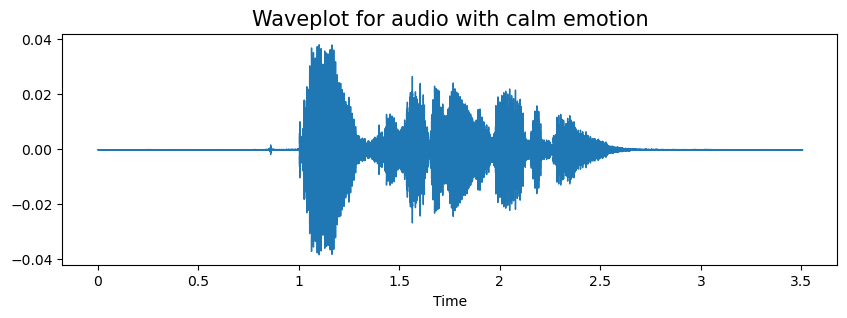

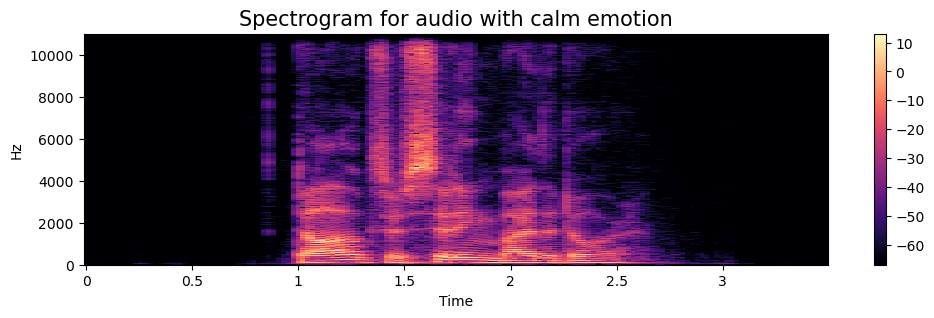

-------------------------------------------------------------
[ 6.88525736e-01  7.38671720e-01  7.71074533e-01  7.90327728e-01
  7.39264488e-01  6.67541444e-01  6.57455862e-01  6.80097580e-01
  7.03753352e-01  7.05024660e-01  7.13346958e-01  6.99988067e-01
 -6.97166138e+02  6.51082001e+01  9.30368006e-01  1.36336269e+01
  5.95959616e+00  2.89507008e+00 -1.34181857e+00 -4.77575350e+00
 -8.67151546e+00 -4.55299854e+00  1.97060466e+00 -1.62764609e+00
  1.42672610e+00 -4.51268101e+00  1.48563385e+00  1.20333739e-01
 -6.28618574e+00 -2.64415145e+00 -7.36551881e-02 -1.72462070e+00
 -5.88814878e+00 -1.49296069e+00 -2.29405189e+00 -3.25107551e+00
 -2.33111525e+00 -1.04993606e+00 -5.42169714e+00  8.98910344e-01
 -3.83309627e+00 -1.10061169e-01 -3.14054656e+00 -1.75259769e+00
 -2.55071330e+00 -3.11522031e+00 -4.21817684e+00 -2.03045154e+00
 -2.16783547e+00 -2.31338167e+00 -4.75838470e+00 -2.87276316e+00
  1.86359341e-06  8.65261245e-05  8.06221459e-03  5.18941395e-02
  3.25559787e-02  1.93524268

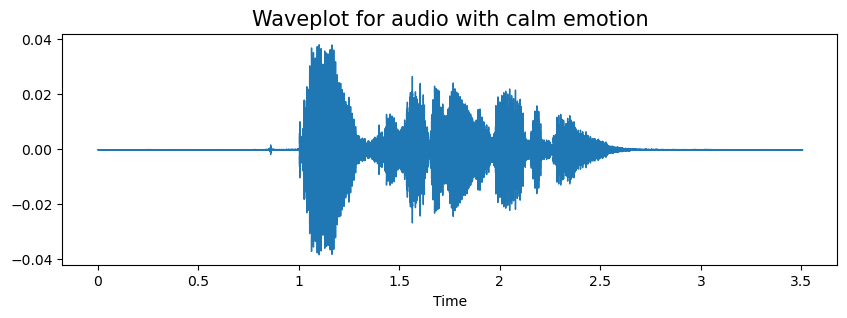

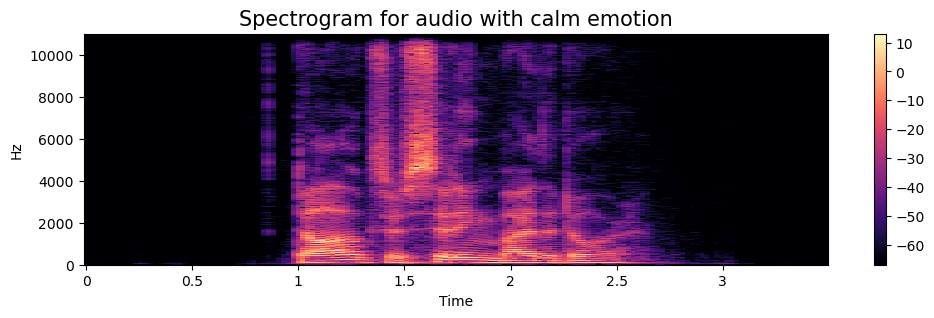

-------------------------------------------------------------
[ 6.88525736e-01  7.38671720e-01  7.71074533e-01  7.90327728e-01
  7.39264488e-01  6.67541444e-01  6.57455862e-01  6.80097580e-01
  7.03753352e-01  7.05024660e-01  7.13346958e-01  6.99988067e-01
 -6.97166138e+02  6.51082001e+01  9.30368006e-01  1.36336269e+01
  5.95959616e+00  2.89507008e+00 -1.34181857e+00 -4.77575350e+00
 -8.67151546e+00 -4.55299854e+00  1.97060466e+00 -1.62764609e+00
  1.42672610e+00 -4.51268101e+00  1.48563385e+00  1.20333739e-01
 -6.28618574e+00 -2.64415145e+00 -7.36551881e-02 -1.72462070e+00
 -5.88814878e+00 -1.49296069e+00 -2.29405189e+00 -3.25107551e+00
 -2.33111525e+00 -1.04993606e+00 -5.42169714e+00  8.98910344e-01
 -3.83309627e+00 -1.10061169e-01 -3.14054656e+00 -1.75259769e+00
 -2.55071330e+00 -3.11522031e+00 -4.21817684e+00 -2.03045154e+00
 -2.16783547e+00 -2.31338167e+00 -4.75838470e+00 -2.87276316e+00
  1.86359341e-06  8.65261245e-05  8.06221459e-03  5.18941395e-02
  3.25559787e-02  1.93524268

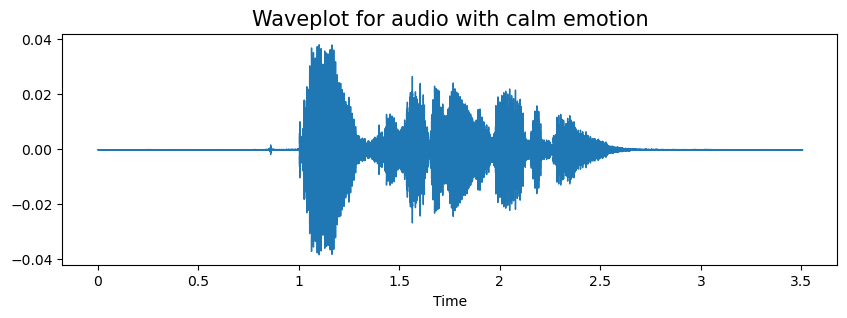

In [ ]:
#ploating waveplot and spectogram for each emotion 
def get_audio(path,sr,e):
    print("This audio is for Emotion",e)
    ipd.display(ipd.Audio(path, rate=sr))

def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    lr.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = lr.stft(data)
    Xdb = lr.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()
    plt.show()
    print("-------------------------------------------------------------")
    
import IPython   
import IPython.display as ipd
import librosa.display
y=[]
for i in Ravdess_df['Emotions']:
    emotion = i
    y.append(emotion)
    path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[2]
    data, sampling_rate = lr.load(path)
    extract_feature(data, sampling_rate)
    features=pd.DataFrame(x)
    emotions=pd.DataFrame(y)
    
    get_audio(path,sampling_rate,emotion)
    create_waveplot(data, sampling_rate, emotion)
    create_spectrogram(data, sampling_rate, emotion)

## <font color='#002B54'> 4.Feature Extraction </font>

In [11]:
#Feature Extraction of Audio Files Function 
#Extract features (mfcc, chroma, mel) from a sound file
import pandas as pd
x=[]
def extract_feature(data,sampling_rate):
    result=np.array([])
    #Path=i
    #result=np.hstack((result, Path))
    
    stft = np.abs(librosa.stft(data))
    chromagram = np.mean(librosa.feature.chroma_stft(S=stft, sr=sampling_rate).T, axis=0)
    result=np.hstack((result, chromagram))
     
        
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40).T, axis=0)
    result=np.hstack((result, mfcc))
    
    
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=sampling_rate,n_mels=128).T,axis=0)
    result=np.hstack((result, mel))
    
    x.append(result)
    
    
    print(result)
    

    return result


In [ ]:
# Convering list of all extracted feature(x)and emotions(y) into dataframe (features & emotions)  
features=pd.DataFrame(x)
emotions=pd.DataFrame(y)

In [14]:
#Creating dataframe of all extracted features and our target variable
final_dataframe = pd.concat([emotions,features], axis=1)
#final_dataframe=features

In [15]:
# Storing final_dataframe into final_dataframe.csv for further computation
final_dataframe.to_csv('feature_extract.csv', index=False)

## <font color='#002B54'> 5.EDA (Exploratory Data Analysis) </font>

### <font color='#002B54'> Variable identification & Data Types </font>

In [16]:
final_dataframe.dtypes

0       object
0      float64
1      float64
2      float64
3      float64
        ...   
175    float64
176    float64
177    float64
178    float64
179    float64
Length: 181, dtype: object

In [17]:
final_dataframe, final_dataframe.nunique()

(         0         0         1         2         3         4         5    \
 0    neutral  0.765898  0.793222  0.788278  0.798253  0.769865  0.680034   
 1    neutral  0.765898  0.793222  0.788278  0.798253  0.769865  0.680034   
 2    neutral  0.765898  0.793222  0.788278  0.798253  0.769865  0.680034   
 3    neutral  0.765898  0.793222  0.788278  0.798253  0.769865  0.680034   
 4       calm  0.688526  0.738672  0.771075  0.790328  0.739264  0.667541   
 ..       ...       ...       ...       ...       ...       ...       ...   
 129     calm  0.688526  0.738672  0.771075  0.790328  0.739264  0.667541   
 130     calm  0.688526  0.738672  0.771075  0.790328  0.739264  0.667541   
 131     calm  0.688526  0.738672  0.771075  0.790328  0.739264  0.667541   
 132    happy  0.693848  0.723479  0.759768  0.732952  0.684231  0.652018   
 133    happy  0.693848  0.723479  0.759768  0.732952  0.684231  0.652018   
 
           6         7         8    ...       170       171       172  \
 

### <font color='#002B54'> Analyzing the basic metrics </font>

In [18]:
final_dataframe.shape

(134, 181)

In [19]:
final_dataframe.describe()

0           1           2           3           4           5    \
count  134.000000  134.000000  134.000000  134.000000  134.000000  134.000000   
mean     0.716728    0.749322    0.763863    0.765740    0.713684    0.658474   
std      0.035432    0.021792    0.031271    0.029436    0.033782    0.022042   
min      0.670340    0.723479    0.708731    0.714755    0.671781    0.612217   
25%      0.688526    0.731805    0.759768    0.735256    0.684231    0.652018   
50%      0.705003    0.744671    0.771075    0.788807    0.730402    0.667541   
75%      0.756434    0.755143    0.788278    0.790328    0.739264    0.675921   
max      0.771060    0.793222    0.797124    0.798253    0.769865    0.682063   

              6           7           8           9    ...         170  \
count  134.000000  134.000000  134.000000  134.000000  ...  134.000000   
mean     0.665867    0.712781    0.733338    0.711888  ...    0.000105   
std      0.018746    0.028044    0.029987    0.028402  ...    0.000227   
min      0.637457    0.680098    0.695054    0.662130  ...    0.000008   
25%      0.656162    0.693474    0.703753    0.705025  ...    0.000008   
50%      0.659589    0.710225    0.730609    0.706472  ...    0.000014   
75%      0.673258    0.718917    0.763575    0.740045  ...    0.000042   
max      0.698304    0.776760    0.778452    0.752279  ...    0.000718   

              171         172         173         174         175         176  \
count  134.000000  134.000000  134.000000  134.000000  134.000000  134.000000   
mean     0.000076    0.000058    0.000048    0.000041    0.000043    0.000066   
std      0.000154    0.000111    0.000081    0.000044    0.000037    0.000065   
min      0.000008    0.000008    0.000006    0.000007    0.000006    0.000007   
25%      0.000009    0.000009    0.000010    0.000010    0.000012    0.000016   
50%      0.000013    0.000010    0.000014    0.000022    0.000021    0.000037   
75%      0.000038    0.000032    0.000026    0.000035    0.000058    0.000097   
max      0.000490    0.000358    0.000266    0.000140    0.000107    0.000212   

              177         178           179  
count  134.000000  134.000000  1.340000e+02  
mean     0.000084    0.000049  4.982629e-06  
std      0.000097    0.000070  8.115607e-06  
min      0.000009    0.000008  7.576905e-07  
25%      0.000020    0.000013  8.825449e-07  
50%      0.000036    0.000021  2.151199e-06  
75%      0.000123    0.000041  2.656039e-06  
max      0.000321    0.000236  2.671625e-05  

[8 rows x 180 columns]

In [20]:
final_dataframe.groupby([1]).mean()

0         2         3         4         5         6    \
1                                                                      
0.723479  0.693848  0.759768  0.732952  0.684231  0.652018  0.655730   
0.729516  0.670340  0.777541  0.768362  0.676864  0.612217  0.637457   
0.738672  0.688526  0.771075  0.790328  0.739264  0.667541  0.657456   
0.744671  0.705003  0.795186  0.790227  0.730402  0.682063  0.659589   
0.746541  0.711967  0.716214  0.742167  0.749842  0.675921  0.659724   
0.755143  0.756434  0.708731  0.714755  0.692161  0.636235  0.698304   
0.782866  0.771060  0.797124  0.788807  0.671781  0.663426  0.692734   
0.793222  0.765898  0.788278  0.798253  0.769865  0.680034  0.673258   

               7         8         9         10   ...       170       171  \
1                                                 ...                       
0.723479  0.710225  0.730609  0.722500  0.746194  ...  0.000014  0.000013   
0.729516  0.697412  0.705373  0.662130  0.647964  ...  0.000042  0.000043   
0.738672  0.680098  0.703753  0.705025  0.713347  ...  0.000008  0.000009   
0.744671  0.693474  0.695054  0.678006  0.730821  ...  0.000016  0.000022   
0.746541  0.717568  0.748187  0.740850  0.752233  ...  0.000718  0.000490   
0.755143  0.776760  0.778452  0.706472  0.703837  ...  0.000054  0.000038   
0.782866  0.725988  0.764391  0.740045  0.742812  ...  0.000012  0.000008   
0.793222  0.718917  0.763575  0.752279  0.701803  ...  0.000008  0.000010   

               172       173       174       175       176       177  \
1                                                                      
0.723479  0.000008  0.000006  0.000009  0.000011  0.000015  0.000019   
0.729516  0.000034  0.000026  0.000022  0.000018  0.000017  0.000023   
0.738672  0.000010  0.000014  0.000035  0.000058  0.000097  0.000123   
0.744671  0.000020  0.000017  0.000014  0.000017  0.000023  0.000036   
0.746541  0.000358  0.000266  0.000140  0.000098  0.000212  0.000321   
0.755143  0.000032  0.000046  0.000089  0.000107  0.000106  0.000093   
0.782866  0.000009  0.000009  0.000007  0.000006  0.000007  0.000009   
0.793222  0.000010  0.000012  0.000015  0.000021  0.000037  0.000024   

               178           179  
1                                 
0.723479  0.000013  8.034746e-07  
0.729516  0.000018  2.151199e-06  
0.738672  0.000041  2.656039e-06  
0.744671  0.000021  1.797092e-06  
0.746541  0.000236  2.671625e-05  
0.755143  0.000044  4.579505e-06  
0.782866  0.000008  7.576905e-07  
0.793222  0.000013  1.119756e-06  

[8 rows x 179 columns]

### <font color='#002B54'> Non-Graphical Univariate Analysis </font>

In [21]:
final_dataframe.apply(lambda x: sum(x.isnull()),axis=0)

0      0
0      0
1      0
2      0
3      0
      ..
175    0
176    0
177    0
178    0
179    0
Length: 181, dtype: int64

In [22]:
final_dataframe.isnull().values.any()

False

## <font color='#002B54'> Graphical Representation Of features </font>

### <font color='#002B54'> 1. Chroma</font>

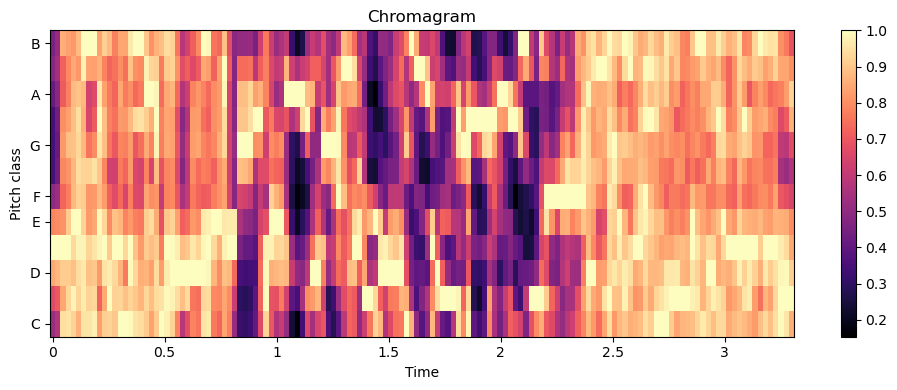

In [23]:
x,sr=librosa.load(Ravdess_df.Path[0])
S = np.abs(librosa.stft(x))
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

### <font color='#002B54'>2. MFCC </font>

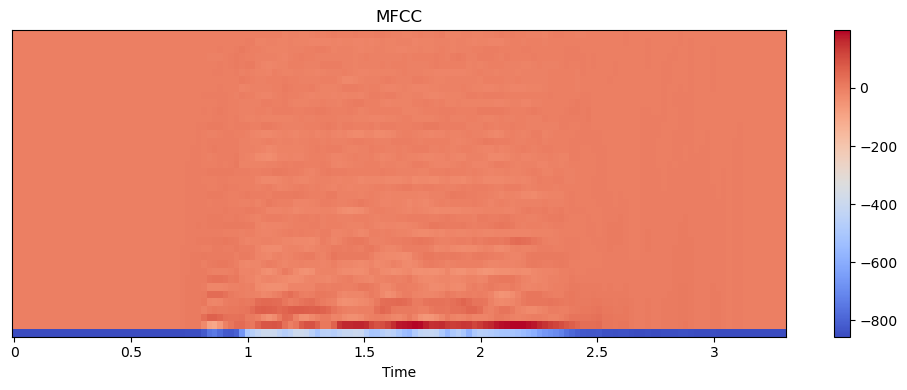

In [24]:
mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

###   <font color='#002B54'> 3. Mel Spectogram </font>

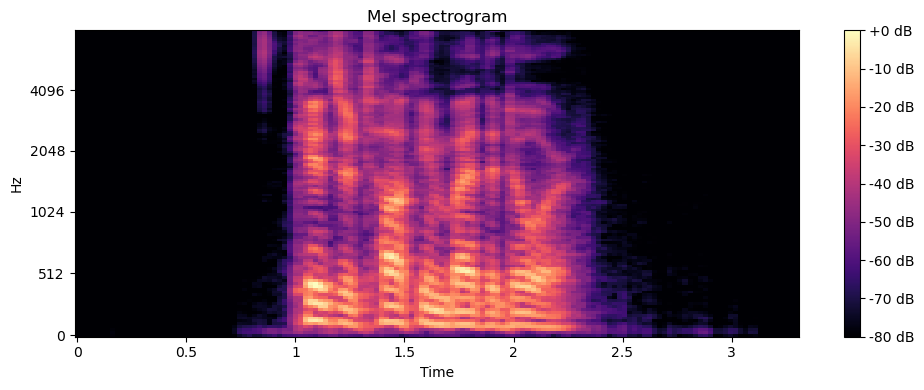

In [25]:
S = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

## <font color='#002B54'> 6.Data Pre-processing </font>

In [26]:
Ravdess_df=pd.read_csv("feature_extract.csv")

In [27]:
Ravdess_df.head()

0       0.1         1         2         3         4         5  \
0  neutral  0.765898  0.793222  0.788278  0.798253  0.769865  0.680034   
1  neutral  0.765898  0.793222  0.788278  0.798253  0.769865  0.680034   
2  neutral  0.765898  0.793222  0.788278  0.798253  0.769865  0.680034   
3  neutral  0.765898  0.793222  0.788278  0.798253  0.769865  0.680034   
4     calm  0.688526  0.738672  0.771075  0.790328  0.739264  0.667541   

          6         7         8  ...       170       171      172       173  \
0  0.673258  0.718917  0.763575  ...  0.000008  0.000010  0.00001  0.000012   
1  0.673258  0.718917  0.763575  ...  0.000008  0.000010  0.00001  0.000012   
2  0.673258  0.718917  0.763575  ...  0.000008  0.000010  0.00001  0.000012   
3  0.673258  0.718917  0.763575  ...  0.000008  0.000010  0.00001  0.000012   
4  0.657456  0.680098  0.703753  ...  0.000008  0.000009  0.00001  0.000014   

        174       175       176       177       178       179  
0  0.000015  0.000021  0.000037  0.000024  0.000013  0.000001  
1  0.000015  0.000021  0.000037  0.000024  0.000013  0.000001  
2  0.000015  0.000021  0.000037  0.000024  0.000013  0.000001  
3  0.000015  0.000021  0.000037  0.000024  0.000013  0.000001  
4  0.000035  0.000058  0.000097  0.000123  0.000041  0.000003  

[5 rows x 181 columns]

### <font color='#002B54'> Seperating target variable and feature variable </font>

In [28]:
X = Ravdess_df.iloc[: ,1:].values
y=Ravdess_df["0"].values

### <font color='#002B54'> Splitting X and y into train and test set </font>

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.20)# shuffle=True

In [30]:
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [31]:
y

array(['neutral', 'neutral', 'neutral', 'neutral', 'calm', 'calm', 'calm',
       'calm', 'calm', 'calm', 'calm', 'calm', 'happy', 'happy', 'happy',
       'happy', 'happy', 'happy', 'happy', 'happy', 'sad', 'sad', 'sad',
       'sad', 'sad', 'sad', 'sad', 'sad', 'angry', 'angry', 'angry',
       'angry', 'angry', 'angry', 'angry', 'angry', 'fear', 'fear',
       'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'disgust',
       'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust',
       'disgust', 'surprise', 'surprise', 'surprise', 'surprise',
       'surprise', 'surprise', 'surprise', 'surprise', 'neutral',
       'neutral', 'neutral', 'neutral', 'calm', 'calm', 'calm', 'calm',
       'calm', 'calm', 'calm', 'calm', 'happy', 'happy', 'happy', 'happy',
       'happy', 'happy', 'happy', 'happy', 'sad', 'sad', 'sad', 'sad',
       'sad', 'sad', 'sad', 'sad', 'angry', 'angry', 'angry', 'angry',
       'angry', 'angry', 'angry', 'angry', 'fear', 'fear', 'fear', 'fear',
      

# <font color='#002B54'> 7. Model Building </font>

## <font color='#002B54'> Multi Layer Perceptron Classifier (MLP) </font>

In [32]:
# Initializing the Multi Layer Perceptron Classifier
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(alpha=0.01, batch_size=16, epsilon=1e-08, hidden_layer_sizes=(1000), learning_rate='adaptive', max_iter=500, activation='relu')

In [33]:
# Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=16, hidden_layer_sizes=1000,
              learning_rate='adaptive', max_iter=500)

In [38]:
# Predict for the test set
y_pred=model.predict(x_test)

In [39]:
# Calculate the accuracy of our model
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 100.00%


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       angry       1.00      1.00      1.00         1
        calm       1.00      1.00      1.00         5
     disgust       1.00      1.00      1.00         6
        fear       1.00      1.00      1.00         5
       happy       1.00      1.00      1.00         5
     neutral       1.00      1.00      1.00         1
         sad       1.00      1.00      1.00         4

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



In [41]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred)
print (matrix)

[[1 0 0 0 0 0 0]
 [0 5 0 0 0 0 0]
 [0 0 6 0 0 0 0]
 [0 0 0 5 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 4]]


In [42]:
result = pd.DataFrame({'predicted_values': y_pred})
result["Actual_Values"]=pd.DataFrame(y_test)
result[:10]

predicted_values Actual_Values
0             calm          calm
1             calm          calm
2          disgust       disgust
3            happy         happy
4             fear          fear
5          neutral       neutral
6            happy         happy
7          disgust       disgust
8             fear          fear
9             fear          fear

In [43]:
# SAVING THE MODEL
# Saving the Model to file in the current working directory

import pickle
Pkl_Filename = "new_mlp_74.pkl"
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

### <font color='#002B54'> On Microphone data </font>

In [44]:
import librosa
import speech_recognition as sr

# obtain audio from the microphone
r = sr.Recognizer()
with sr.Microphone() as source:
    print("Hiii SARK's Say something!")
    audio = r.listen(source,phrase_time_limit=4)
    
# write audio to a WAV file
with open("output1.wav", "wb") as f:
    f.write(audio.get_wav_data())

Hiii SARK's Say something!


In [45]:
#Audio to text

txt=sr.AudioFile("output1.wav")

with txt as source:
    audio = r.record(source)
try:
    s = r.recognize_google(audio)
    print("You Said  : "+s)
except Exception as e:
    print("Exception: "+str(e))

ipd.display(ipd.Audio('output1.wav'))

Exception: FLAC conversion utility not available - consider installing the FLAC command line application by running `apt-get install flac` or your operating system's equivalent


In [46]:
x=[]

#for i in range (0,20,1):
data, sampling_rate = librosa.load('output1.wav')
feature=extract_feature(data,sampling_rate)
x.append(feature)
print(data,"  ",sampling_rate)

[ 7.19771445e-01  6.95009232e-01  6.67005479e-01  6.66425228e-01
  6.88024461e-01  7.93078482e-01  8.24678004e-01  7.44679630e-01
  6.95955276e-01  6.89126372e-01  6.81473672e-01  7.17974305e-01
 -7.38146240e+02  8.76847458e+01 -1.18114824e+01  3.15197811e+01
  1.02429838e+01 -5.07917166e+00 -1.16378202e+01 -2.18770576e+00
 -8.04884434e+00 -6.03404713e+00 -5.19719839e+00 -1.41543531e+01
 -8.77010345e+00 -9.61664581e+00 -7.03260040e+00 -7.79095936e+00
 -3.10951471e+00 -2.09853005e+00 -1.80778742e+00 -2.16891602e-01
 -5.61715174e+00 -4.63197708e+00 -4.83059216e+00 -4.96079397e+00
 -9.07571125e+00 -8.03846264e+00 -6.11125088e+00 -8.71125221e+00
 -8.21972179e+00 -7.25804901e+00 -6.27532864e+00 -6.27534294e+00
 -4.69210911e+00 -3.64799857e+00 -4.49970293e+00 -3.76720953e+00
 -2.17726469e+00 -3.08601046e+00 -2.50497198e+00 -5.24530530e-01
  2.40944473e-07  1.33845060e-06  9.42448096e-05  2.18946468e-02
  8.98935720e-02  1.16930343e-02  7.21866847e-04  9.62046208e-04
  3.08796228e-03  3.93517

In [47]:
import pickle
Pkl_Filename = "new_mlp_79.pkl"
# Loading the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    model= pickle.load(file)

In [48]:
model.predict(x)

array(['calm', 'calm'], dtype='<U8')

# <font color='#002B54'> Sequential </font>

### <font color='#002B54'> Separating target and feature variables </font>

In [49]:
X = Ravdess_df.iloc[: ,1:].values
Y = Ravdess_df['0'].values

In [50]:
X

array([[7.65898407e-01, 7.93222010e-01, 7.88278162e-01, ...,
        2.42458536e-05, 1.34415195e-05, 1.11975589e-06],
       [7.65898407e-01, 7.93222010e-01, 7.88278162e-01, ...,
        2.42458536e-05, 1.34415195e-05, 1.11975589e-06],
       [7.65898407e-01, 7.93222010e-01, 7.88278162e-01, ...,
        2.42458536e-05, 1.34415195e-05, 1.11975589e-06],
       ...,
       [6.88525736e-01, 7.38671720e-01, 7.71074533e-01, ...,
        1.22736194e-04, 4.09652894e-05, 2.65603944e-06],
       [6.93848133e-01, 7.23478615e-01, 7.59767771e-01, ...,
        1.89758448e-05, 1.28757110e-05, 8.03474563e-07],
       [6.93848133e-01, 7.23478615e-01, 7.59767771e-01, ...,
        1.89758448e-05, 1.28757110e-05, 8.03474563e-07]])

### <font color='#002B54'> One Hot Encoding our Target variable </font>

In [51]:
# As this is a multiclass classification problem, we're onehotencoding our Y
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

### <font color='#002B54'> Splitting X and y into train and test set </font>

In [52]:
# Splitting data in Train-Test sets

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=9, test_size=0.10)#42
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((120, 180), (120, 8), (14, 180), (14, 8))

### <font color='#002B54'> Scaling Data </font>

In [53]:
# Scaling our data with sklearn's Standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((120, 180), (120, 8), (14, 180), (14, 8))

### <font color='#002B54'> Making data compatible for Neural Networks </font>

In [54]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

In [55]:
x_train.shape, x_test.shape

((120, 180, 1), (14, 180, 1))

### <font color='#002B54'> Importing necessary modules </font>

In [56]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.optimizers import RMSprop


### <font color='#002B54'> Model Definition </font>

In [57]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',input_shape=(180,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(64, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 180, 256)          1536      
                                                                 
 activation (Activation)     (None, 180, 256)          0         
                                                                 
 dropout (Dropout)           (None, 180, 256)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 45, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 45, 128)           163968    
                                                                 
 activation_1 (Activation)   (None, 45, 128)           0         
                                                        

### <font color='#002B54'> Model compiling </font>

In [58]:
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [59]:
y_train

array([[0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 

### <font color='#002B54'> Model fitting </font>

In [60]:
cnnhistory=model.fit(x_train, y_train, batch_size=16, epochs=200, validation_data=(x_test, y_test))

Epoch 1/200
8/8 [==============================] - 2s 76ms/step - loss: 2.0319 - accuracy: 0.1833 - val_loss: 1.9976 - val_accuracy: 0.2857
Epoch 2/200
8/8 [==============================] - 0s 51ms/step - loss: 1.9160 - accuracy: 0.3917 - val_loss: 1.9273 - val_accuracy: 0.3571
Epoch 3/200
8/8 [==============================] - 0s 45ms/step - loss: 1.8443 - accuracy: 0.5083 - val_loss: 1.8652 - val_accuracy: 0.3571
Epoch 4/200
8/8 [==============================] - 0s 42ms/step - loss: 1.7690 - accuracy: 0.5583 - val_loss: 1.7924 - val_accuracy: 0.3571
Epoch 5/200
8/8 [==============================] - 0s 43ms/step - loss: 1.6856 - accuracy: 0.6167 - val_loss: 1.7223 - val_accuracy: 0.7143
Epoch 6/200
8/8 [==============================] - 0s 43ms/step - loss: 1.6138 - accuracy: 0.7417 - val_loss: 1.6521 - val_accuracy: 0.8571
Epoch 7/200
8/8 [==============================] - 0s 41ms/step - loss: 1.5254 - accuracy: 0.8667 - val_loss: 1.5675 - val_accuracy: 0.8571
Epoch 8/200
8/8 [===

8/8 [==============================] - 0s 41ms/step - loss: 2.4239e-07 - accuracy: 1.0000 - val_loss: 5.1941e-07 - val_accuracy: 1.0000
Epoch 115/200
8/8 [==============================] - 0s 41ms/step - loss: 1.4802e-07 - accuracy: 1.0000 - val_loss: 5.2793e-07 - val_accuracy: 1.0000
Epoch 116/200
8/8 [==============================] - 0s 41ms/step - loss: 1.9272e-07 - accuracy: 1.0000 - val_loss: 4.8535e-07 - val_accuracy: 1.0000
Epoch 117/200
8/8 [==============================] - 0s 40ms/step - loss: 1.7186e-07 - accuracy: 1.0000 - val_loss: 4.5129e-07 - val_accuracy: 1.0000
Epoch 118/200
8/8 [==============================] - 0s 41ms/step - loss: 1.4206e-07 - accuracy: 1.0000 - val_loss: 4.0020e-07 - val_accuracy: 1.0000
Epoch 119/200
8/8 [==============================] - 0s 43ms/step - loss: 9.2387e-08 - accuracy: 1.0000 - val_loss: 3.7466e-07 - val_accuracy: 1.0000
Epoch 120/200
8/8 [==============================] - 0s 46ms/step - loss: 1.6789e-07 - accuracy: 1.0000 - val_loss

Epoch 169/200
8/8 [==============================] - 0s 43ms/step - loss: 2.1855e-08 - accuracy: 1.0000 - val_loss: 7.6635e-08 - val_accuracy: 1.0000
Epoch 170/200
8/8 [==============================] - 0s 44ms/step - loss: 1.6888e-08 - accuracy: 1.0000 - val_loss: 7.6635e-08 - val_accuracy: 1.0000
Epoch 171/200
8/8 [==============================] - 0s 47ms/step - loss: 3.6756e-08 - accuracy: 1.0000 - val_loss: 7.6635e-08 - val_accuracy: 1.0000
Epoch 172/200
8/8 [==============================] - 0s 45ms/step - loss: 6.9539e-08 - accuracy: 1.0000 - val_loss: 7.6635e-08 - val_accuracy: 1.0000
Epoch 173/200
8/8 [==============================] - 0s 44ms/step - loss: 3.0796e-08 - accuracy: 1.0000 - val_loss: 6.8120e-08 - val_accuracy: 1.0000
Epoch 174/200
8/8 [==============================] - 0s 42ms/step - loss: 2.1855e-08 - accuracy: 1.0000 - val_loss: 6.8120e-08 - val_accuracy: 1.0000
Epoch 175/200
8/8 [==============================] - 0s 45ms/step - loss: 1.9868e-08 - accuracy: 1.0

### <font color='#002B54'> Model analysis </font>

1/1 [==============================] - 0s 28ms/step - loss: 4.2575e-08 - accuracy: 1.0000
Accuracy of our model on test data :  100.0 %


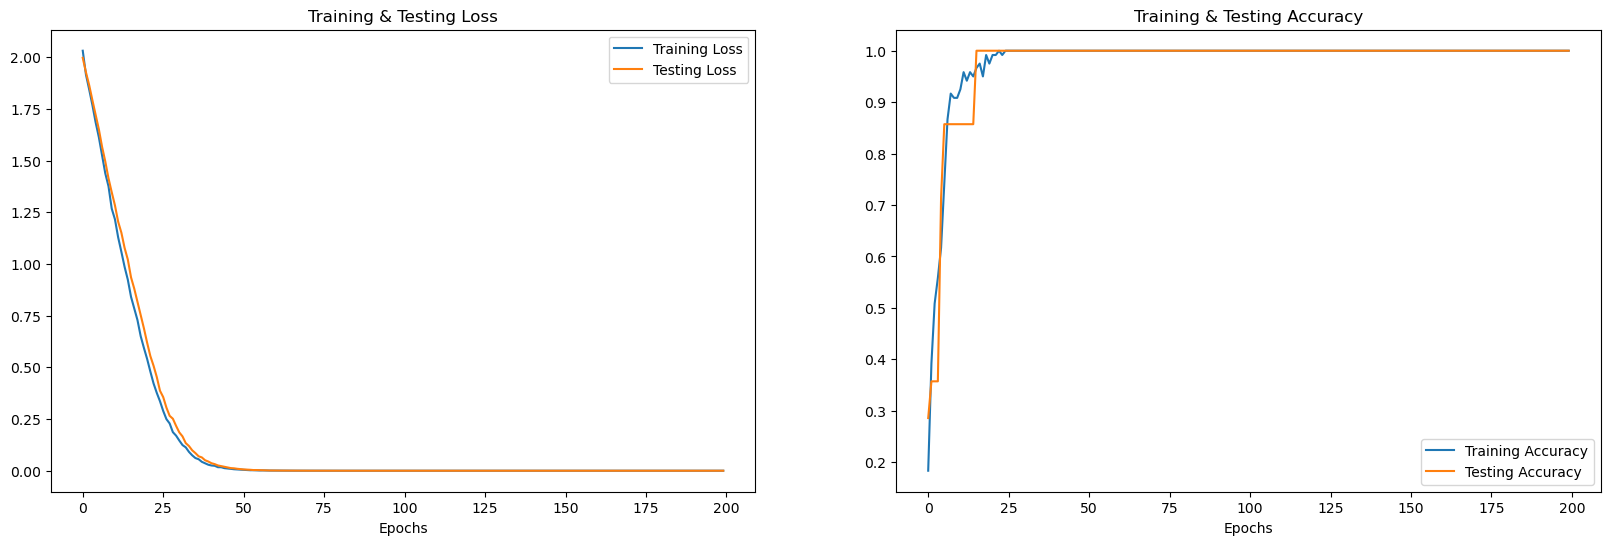

In [61]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(200)]
fig , ax = plt.subplots(1,2)
train_acc = cnnhistory.history['accuracy']
train_loss = cnnhistory.history['loss']
test_acc = cnnhistory.history['val_accuracy']
test_loss = cnnhistory.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()


### <font color='#002B54'> Saving the Model </font>

In [63]:
model_name = 'By_Sequential_12-4.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\ASUS\Desktop\Project Final\saved_models\By_Sequential_12-4.h5 


In [64]:
import json
model_json = model.to_json()
with open("By_Sequential_12-4.json", "w") as json_file:
    json_file.write(model_json)

### <font color='#002B54'> Loading the model </font>

In [66]:
# Loading the model
# Loading json and creating model

from keras.models import model_from_json
json_file = open('By_Sequential_12-4.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("saved_models/By_Sequential_12-4.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 100.00%


### <font color='#002B54'> Applying model on test data </font>

In [67]:
preds = loaded_model.predict(x_test, batch_size=10,verbose=1)

2/2 [==============================] - 0s 19ms/step


In [68]:
predict=preds.argmax(axis=1)
actual=y_test.argmax(axis=1)


In [69]:
predict = pd.DataFrame(predict, columns=['Predicted_y'])
actual = pd.DataFrame(actual, columns=['Actual'])

In [70]:
result=pd.concat([predict,actual],axis=1)

In [71]:
result['Predicted_y']=result['Predicted_y'].map({0:'neutral', 1:'calm', 2:'happy', 3:'sad', 4:'angry', 5:'fear', 6:'disgust', 7:'surprise'})
result['Actual']=result['Actual'].map({0:'neutral', 1:'calm', 2:'happy', 3:'sad', 4:'angry', 5:'fear', 6:'disgust', 7:'surprise'})


In [72]:
result.head(6)

Predicted_y    Actual
0        calm      calm
1        fear      fear
2        calm      calm
3        calm      calm
4    surprise  surprise
5        fear      fear

In [73]:
#by microphone 
op=np.expand_dims(x,-1)
pred=loaded_model.predict(op)


1/1 [==============================] - 0s 26ms/step
